## PyTorch

PyTorch is a Python-based scientific computing package that uses the power of graphics processing units(GPU). It is also one of the preferred deep learning research platforms built to provide maximum flexibility and speed. It is known for providing two of the most high-level features; namely, tensor computations with strong GPU acceleration support and building deep neural networks on a tape-based autograd systems.

There are many existing Python libraries which have the potential to change how deep learning and artificial intelligence are performed, and this is one such library. One of the key reasons behind PyTorch’s success is it is completely Pythonic and one can build neural network models effortlessly. I

In [33]:
import torch
import numpy as np

import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# A random matrix

a = torch.rand(4,3)
print(a)

tensor([[0.5155, 0.0389, 0.1659],
        [0.5526, 0.4663, 0.3255],
        [0.6136, 0.5468, 0.0951],
        [0.5378, 0.3395, 0.2698]])


In [3]:
# An uninitialized matrix

a = torch.empty(6,3)
print(a)

tensor([[1.7048e-35, 0.0000e+00, 7.0065e-44],
        [6.8664e-44, 6.3058e-44, 6.7262e-44],
        [6.8664e-44, 6.3058e-44, 7.0065e-44],
        [7.7071e-44, 1.1771e-43, 6.7262e-44],
        [7.7071e-44, 8.1275e-44, 7.4269e-44],
        [6.7262e-44, 8.1275e-44, 7.4269e-44]])


In [4]:
# Zeros of long type

a = torch.zeros(4,3, dtype=torch.long)
print(a)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
a = torch.tensor([7.8, 5])
print(type(a))
print(a)

<class 'torch.Tensor'>
tensor([7.8000, 5.0000])


In [6]:
# create new tensor with existing tensor.These methods we reuse its properties of input tensor, e.g. dtype, unless new values are provided by us.

a = a.new_ones(6,5, dtype=torch.double)    # new methods take in sizes
print(a)

a = torch.randn_like(a, dtype=torch.float)  # override dtype
print(a) 

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=torch.float64)
tensor([[-1.0519,  1.0432, -1.5975,  0.9255, -2.3597],
        [ 2.0774,  0.6456, -0.9925, -0.0159,  0.6848],
        [ 1.8553,  0.7011,  0.1470,  0.7665, -0.8527],
        [ 0.4408,  1.0143, -0.3562, -0.7992, -0.7945],
        [-0.5194,  1.9295,  0.4357, -0.1182,  0.3069],
        [-1.5842, -0.3617,  2.6013, -2.2712, -2.4387]])


In [7]:
# Addition

b = torch.rand(6,5)
print(b)
print(a + b)

tensor([[0.6690, 0.7973, 0.4365, 0.3379, 0.7465],
        [0.4150, 0.8342, 0.9123, 0.7453, 0.0123],
        [0.1353, 0.9534, 0.8121, 0.0045, 0.8859],
        [0.7079, 0.8087, 0.5046, 0.0061, 0.5209],
        [0.9551, 0.2338, 0.2618, 0.5052, 0.9386],
        [0.3359, 0.1879, 0.8720, 0.3808, 0.9976]])
tensor([[-0.3829,  1.8405, -1.1610,  1.2634, -1.6132],
        [ 2.4924,  1.4797, -0.0802,  0.7294,  0.6971],
        [ 1.9905,  1.6545,  0.9591,  0.7710,  0.0332],
        [ 1.1486,  1.8230,  0.1485, -0.7931, -0.2737],
        [ 0.4357,  2.1633,  0.6975,  0.3870,  1.2455],
        [-1.2483, -0.1739,  3.4733, -1.8904, -1.4411]])


In [8]:
# We can use standard NumPy-like indexing

print(a[:,2])

tensor([-1.5975, -0.9925,  0.1470, -0.3562,  0.4357,  2.6013])


In [9]:
# If you have one value tensor, use .item() to get the value of the Python number

a = torch.randn(1)
print(a)
print(a.item())

tensor([0.2546])
0.2546292543411255


### NumPy Bridge

Converting a Torch Tensor to NumPy array and vice versa is breeze.

The Torch Tensor and NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other.

Converting a Torch tensor to NumPy array

In [10]:
x = torch.ones(4)
print(x)

tensor([1., 1., 1., 1.])


In [11]:
y = x.numpy()
print(y)

[1. 1. 1. 1.]


In [12]:
x.add_(1)
print(x)
print(y)

tensor([2., 2., 2., 2.])
[2. 2. 2. 2.]


In [13]:
## Numpy to Torch
f = np.ones(4)
g = torch.from_numpy(f)
print(f)
print(g)

[1. 1. 1. 1.]
tensor([1., 1., 1., 1.], dtype=torch.float64)


In [14]:
np.add(f, 1, out=f)

print(f)
print(g)

[2. 2. 2. 2.]
tensor([2., 2., 2., 2.], dtype=torch.float64)


In [15]:
# All the Tensors on the CPU except a CharTensor support converting to NumPy and back.

# CUDA Tensors

# Tensors can be moved onto any device using the .to method.

In [16]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([3., 3., 3., 3.], device='cuda:0')
tensor([3., 3., 3., 3.], dtype=torch.float64)


In [17]:
x

tensor([2., 2., 2., 2.], device='cuda:0')

### AUTOGRAD : Automatic Differentiaition

This class is an engine to calculate derivatives. It records the graph of all the operations performed on a gradient enabled tensor and creates a acyclic graph called the dynamic computational graph(DCG).The leaves of this graph are input tensors and the roots are output tensors. Gradients are calculated by tracing the graph from the root to the leaf and multiplying every gradient in the way using the chain rule.

In [18]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [19]:
b = a + 2
print(b)

# b was created as a result of an operatio, so it has a grad_fn

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [20]:
c = b * b * 3
out = c.mean()

print(c, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [21]:
out.backward()

In [22]:
print(a.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should have got a matrix of 4.5. Let’s call the out Tensor “o”. We have that 

$o= \frac{1}{4} \sum c_i $ , $c_i= 3(a_i+2)^2$  and $c_i|_{a_i=1}= 27$ . 

Therefore, $\frac{\partial_0}{\partial a_i}=\frac{3(a_i+2)}{2}$, 

hence
$\frac{\partial_0}{\partial a_i}|_{a_i=1} = \frac{9}{2} = 4.5$

In [23]:
train = torchvision.datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = torchvision.datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True, num_workers=2)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False, num_workers=2)

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [25]:
trainset_shape = trainset.dataset.data.shape
testset_shape = testset.dataset.data.shape

print(trainset_shape, testset_shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [32]:
trainset.dataset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [41]:
trainset.dataset.targets[0]

tensor(5)

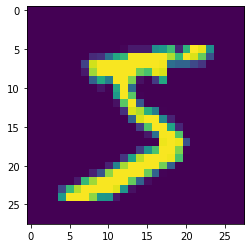

In [42]:
plt.imshow(trainset.dataset.data[0])

<img src="https://miro.medium.com/max/3600/1*HWhBextdDSkxYvz0kEMTVg.png">




In [43]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)   

In [44]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [45]:
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

In [46]:
for epoch in range(5): 
    for data in trainset:  
        X, y = data  
        net.zero_grad()  
        output = net(X.view(-1,784))  
        loss = loss_criterion(output, y)  
        loss.backward()  
        optimizer.step()  
    print(loss)

tensor(1.7454, grad_fn=<NllLossBackward>)
tensor(0.0003, grad_fn=<NllLossBackward>)
tensor(0.2102, grad_fn=<NllLossBackward>)
tensor(0.0142, grad_fn=<NllLossBackward>)
tensor(0.0203, grad_fn=<NllLossBackward>)


In [47]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        
        for idx, i in enumerate(output):
          if torch.argmax(i) == y[idx]:
            correct += 1
          
          total += 1

print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.97


In [63]:
test_iter = iter(testset)

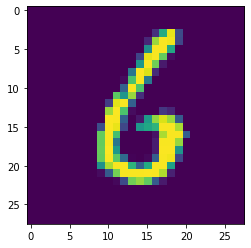

In [76]:
images, labels = next(test_iter)

plt.imshow(images[0][0])

img = images[0].view(1, 784)

In [77]:
output = net(img)

torch.argmax(output)

tensor(6)

In [78]:
labels

tensor([6, 3, 5, 5, 6, 0, 4, 1, 9, 5])